In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json

In [24]:
# Read the sulci-region mapping dictionary from json file
def read_sulci_region_mapping(file_path):
    with open(file_path, 'r') as file:
        mapping = json.load(file)
    return mapping

json_path = "/neurospin/dico/data/deep_folding/current/sulci_regions_gridsearch.json"

mapping = read_sulci_region_mapping(json_path)


print(mapping)



{'brain': {'S.C.-sylv._left': {'S.C._left': ['S.C._left'], 'S.C.sylvian._left': ['S.C.sylvian._left']}, 'S.C.-S.Pe.C._left': {'S.C._left': ['S.C._left'], 'S.C.sylvian._left': ['S.C.sylvian._left'], 'S.Pe.C.inf._left': ['S.Pe.C.inf._left'], 'S.Pe.C.inter._left': ['S.Pe.C.inter._left'], 'S.Pe.C.marginal._left': ['S.Pe.C.marginal._left'], 'S.Pe.C.sup._left': ['S.Pe.C.sup._left'], 'S.Pe.C.median._left': ['S.Pe.C.median._left']}, 'S.C.-S.Po.C._left': {'S.C._left': ['S.C._left'], 'S.C.sylvian._left': ['S.C.sylvian._left'], 'S.Po.C.sup._left': ['S.Po.C.sup._left'], 'F.I.P.Po.C.inf._left': ['F.I.P.Po.C.inf._left'], 'F.C.L.r.retroC.tr._left': ['F.C.L.r.retroC.tr._left']}, 'S.Pe.C._left': {'S.Pe.C.inf._left': ['S.Pe.C.inf._left'], 'S.Pe.C.inter._left': ['S.Pe.C.inter._left'], 'S.Pe.C.marginal._left': ['S.Pe.C.marginal._left'], 'S.Pe.C.sup._left': ['S.Pe.C.sup._left'], 'S.Pe.C.median._left': ['S.Pe.C.median._left']}, 'S.Po.C._left': {'S.Po.C.sup._left': ['S.Po.C.sup._left'], 'F.I.P.Po.C.inf._left

In [25]:
def get_file_list(base_path='/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach'):
    files= []
    # Get the list of files in the directory
    for file in os.listdir(base_path):
        # Check if the file ends with .csv
        if file.endswith(".dat"):
            files.append(file)
    files.remove("morpho_S.Or.l._left.dat")
    files.remove("morpho_F.C.M.r.AMS.ant._left.dat")
    files.remove("morpho_S.Or.l._right.dat")
    files.remove("morpho_F.C.M.r.AMS.ant._right.dat")

    return files

def get_sulci_list(base_path='/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach'):
    files = get_file_list(base_path)
    sulci_list = [x.split('.dat')[0].split('morpho_')[1] for x in files]

    return sulci_list

In [26]:
print(get_sulci_list('/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach'))

['F.Cal.ant.-Sc.Cal._left', 'F.I.P.r.int.1_right', 'F.C.L.r.diag._right', 'S.F.inf._right', 'F.I.P.r.int.1_left', 'S.Pe.C.marginal._left', 'F.C.L.r.retroC.tr._left', 'F.C.L.r.sc.post._left', 'S.T.i.post._left', 'F.C.L.r.asc._left', 'F.C.L.r.sc.ant._right', 'S.F.sup._left', 'S.F.marginal._left', 'F.C.L.a._right', 'S.O.T.lat.ant._right', 'F.P.O._left', 'S.Call._left', 'S.F.orbitaire._right', 'S.R.sup._left', 'F.Coll._right', 'ventricle_left', 'S.T.s.ter.asc.ant._right', 'S.Pe.C.inter._left', 'F.I.P.Po.C.inf._right', 'S.O.T.lat.ant._left', 'S.C._left', 'F.C.L.a._left', 'S.C.LPC._left', 'S.Pe.C.marginal._right', 'S.Olf._left', 'S.R.inf._right', 'S.Li._right', 'F.C.L.r.retroC.tr._right', 'S.F.int._right', 'F.Cal.ant.-Sc.Cal._right', 'S.Po.C.sup._left', 'S.p.C._right', 'S.Pe.C.median._right', 'INSULA_right', 'S.Pe.C.median._left', 'S.T.s.ter.asc.post._right', 'S.Pa.sup._right', 'F.C.L.r.asc._right', 'S.Li._left', 'S.Or._left', 'S.F.median._left', 'S.F.median._right', 'S.T.pol._right', 'S.Po.

In [27]:
print(get_sulci_list('/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach'))

['F.Cal.ant.-Sc.Cal._left', 'F.I.P.r.int.1_right', 'F.C.L.r.diag._right', 'S.F.inf._right', 'F.I.P.r.int.1_left', 'S.Pe.C.marginal._left', 'F.C.L.r.retroC.tr._left', 'F.C.L.r.sc.post._left', 'S.T.i.post._left', 'F.C.L.r.asc._left', 'F.C.L.r.sc.ant._right', 'S.F.sup._left', 'S.F.marginal._left', 'F.C.L.a._right', 'S.O.T.lat.ant._right', 'F.P.O._left', 'S.Call._left', 'S.F.orbitaire._right', 'S.R.sup._left', 'F.Coll._right', 'ventricle_left', 'S.T.s.ter.asc.ant._right', 'S.Pe.C.inter._left', 'F.I.P.Po.C.inf._right', 'S.O.T.lat.ant._left', 'S.C._left', 'F.C.L.a._left', 'S.C.LPC._left', 'S.Pe.C.marginal._right', 'S.Olf._left', 'S.R.inf._right', 'S.Li._right', 'F.C.L.r.retroC.tr._right', 'S.F.int._right', 'F.Cal.ant.-Sc.Cal._right', 'S.Po.C.sup._left', 'S.p.C._right', 'S.Pe.C.median._right', 'INSULA_right', 'S.Pe.C.median._left', 'S.T.s.ter.asc.post._right', 'S.Pa.sup._right', 'F.C.L.r.asc._right', 'S.Li._left', 'S.Or._left', 'S.F.median._left', 'S.F.median._right', 'S.T.pol._right', 'S.Po.

In [6]:
def map_sulcus_to_all_regions(sulcus, mapping):
    """
    Return a list of all region‐names under mapping['brain'] 
    in which 'sulcus' appears.
    """
    hits = []
    for region_name, sub_dict in mapping["brain"].items():
        for key_sulcus, list_values in sub_dict.items():
            if sulcus in list_values:
                hits.append(region_name)
                break  
    return hits


def map_sulci_to_all_regions(sulci_list, mapping):

    result = {}
    for sulcus in sulci_list:
        result[sulcus] = map_sulcus_to_all_regions(sulcus, mapping)
    return result


# Example usage
sulci_list= get_sulci_list('/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach')
sulcus_to_regions = map_sulci_to_all_regions(sulci_list, mapping)

# Affichage rapide :
for sulcus, regs in sulcus_to_regions.items():
    if len(regs) >= 0:
        print(f"{sulcus} : {regs}")




F.Cal.ant.-Sc.Cal._left : ['Sc.Cal.-S.Li._left', 'F.P.O.-S.Cu.-Sc.Cal._left']
F.I.P.r.int.1_right : ['S.T.s.br._right']
F.C.L.r.diag._right : ['S.F.inf.-BROCA-S.Pe.C.inf._right']
S.F.inf._right : ['S.F.inf.-BROCA-S.Pe.C.inf._right']
F.I.P.r.int.1_left : ['S.T.s.br._left']
S.Pe.C.marginal._left : ['S.C.-S.Pe.C._left', 'S.Pe.C._left']
F.C.L.r.retroC.tr._left : ['S.C.-S.Po.C._left', 'S.Po.C._left']
F.C.L.r.sc.post._left : ['F.C.L.p.-subsc.-F.C.L.a.-INSULA._left']
S.T.i.post._left : ['S.T.i.-S.O.T.lat._left', 'S.T.i.-S.T.s.-S.T.pol._left']
F.C.L.r.asc._left : ['S.F.inf.-BROCA-S.Pe.C.inf._left']
F.C.L.r.sc.ant._right : ['F.C.L.p.-subsc.-F.C.L.a.-INSULA._right']
S.F.sup._left : ['S.F.inter.-S.F.sup._left', 'S.F.median-S.F.pol.tr.-S.F.sup._left']
S.F.marginal._left : ['S.F.marginal-S.F.inf.ant._left']
F.C.L.a._right : ['F.C.L.p.-subsc.-F.C.L.a.-INSULA._right']
S.O.T.lat.ant._right : ['S.T.i.-S.O.T.lat._right', 'deMatos._right', 'deMatos_polar._right']
F.P.O._left : ['F.P.O.-S.Cu.-Sc.Cal._left

In [7]:
def group_by_region(sulci_list, regions):
    region_dict = {}
    for region in regions:
        region_dict[region] = []
    for sulcus in sulci_list:
        if sulcus in sulcus_to_regions.keys():
            for region in sulcus_to_regions[sulcus]:
                if region in region_dict.keys():
                    region_dict[region].append(sulcus)
    return region_dict


regions = list(set(region for region_list in sulcus_to_regions.values() for region in region_list))
print("Regions found:", regions)



region_dict = group_by_region(sulci_list,regions)
region_dict["S.F.int.-F.C.M.ant._right"].append('S.R.sup._right')
region_dict["S.F.int.-F.C.M.ant._left"].append('S.R.sup._left')
region_dict["LARGE_CINGULATE._left"].append('S.R.sup._left')
region_dict["LARGE_CINGULATE._right"].append('S.R.sup._right')



print("Sulci grouped by regions:")
# Display the grouped sulci by region
for region, sulci in region_dict.items():
    print(f"{region}: {sulci}")



Regions found: ['F.C.L.p.-subsc.-F.C.L.a.-INSULA._right', 'Lobule_parietal_sup._left', 'S.T.i.-S.T.s.-S.T.pol._left', 'F.P.O.-S.Cu.-Sc.Cal._right', 'F.C.L.p.-subsc.-F.C.L.a.-INSULA._left', 'fronto-parietal_medial_face._right', 'Sc.Cal.-S.Li._left', 'S.Or.-S.Olf._left', 'Sc.Cal.-S.Li._right', 'S.T.s.br._right', 'LARGE_CINGULATE._left', 'OCCIPITAL_right', 'S.Pe.C._left', 'S.T.i.-S.O.T.lat._right', 'deMatos._right', 'S.C.-S.Pe.C._right', 'S.F.median-S.F.pol.tr.-S.F.sup._right', 'S.T.i.-S.T.s.-S.T.pol._right', 'S.s.P.-S.Pa.int._right', 'S.C.-sylv._right', 'F.C.L.p.-S.GSM._left', 'S.F.inter.-S.F.sup._right', 'LARGE_CINGULATE._right', 'S.Po.C._right', 'S.C.-S.Pe.C._left', 'S.F.int.-F.C.M.ant._right', 'F.I.P.-F.I.P.Po.C.inf._left', 'deMatos_polar._left', 'S.T.s.-S.GSM._left', 'S.Or._left', 'fronto-parietal_medial_face._left', 'CINGULATE._left', 'S.F.marginal-S.F.inf.ant._left', 'F.P.O.-S.Cu.-Sc.Cal._left', 'S.F.int.-F.C.M.ant._left', 'F.I.P.-F.I.P.Po.C.inf._right', 'deMatos_polar._right', 'S.

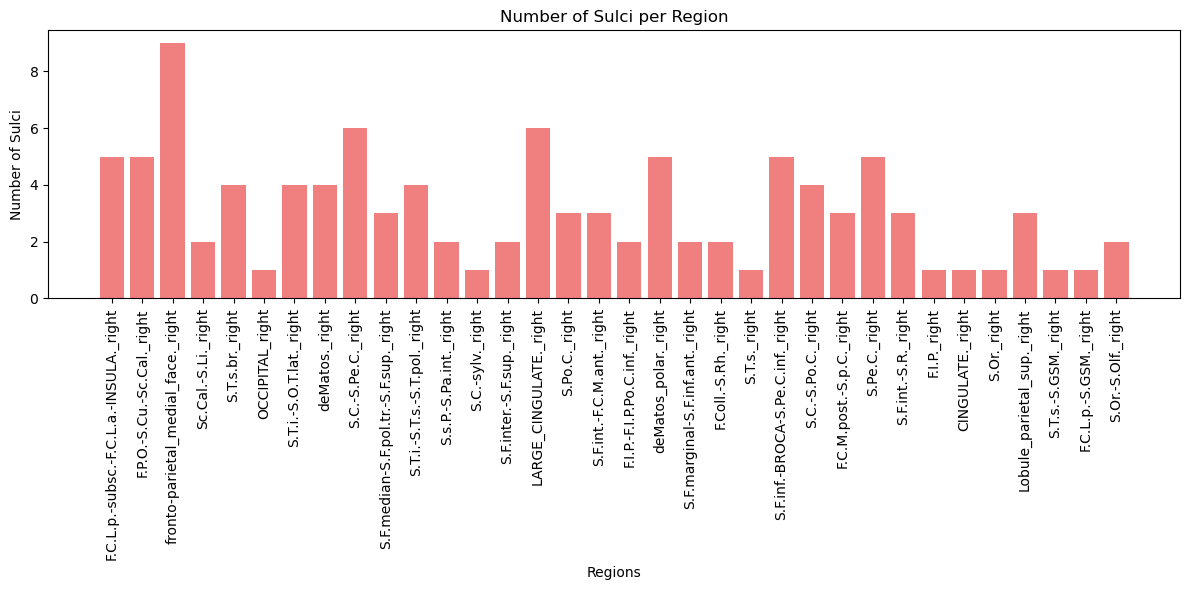

In [8]:
# Statistics on the number of sulci per region
region_counts = {region: len(sulci) for region, sulci in region_dict.items()}

# Plot the number of sulci per region
plt.figure(figsize=(12, 6))

plt.bar(
    [region for region in region_counts.keys() if region.endswith("right")],
    [count for region, count in region_counts.items() if region.endswith("right")],color='lightcoral'
)
plt.xlabel('Regions')
plt.ylabel('Number of Sulci')
plt.title('Number of Sulci per Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
def get_gravity_center_coordinates(base_path , sulci):

    
    # Read the sulci tsv
    file_path = os.path.join(base_path, sulci)
    # Get the coordinates of the gravity center

    sulci_df = pd.read_csv(file_path, sep='\s+').loc[:,["valid","gravityCenter_x", "gravityCenter_y", "gravityCenter_z","surface"]]

    # Filter the dataframe to keep only the valid sulci
    sulci_df = sulci_df[sulci_df['valid'] == 1]

    return sulci_df

In [10]:
#sulci = "morpho_S.Or._left.dat"
sulci= "morpho_S.Pe.C.marginal._left.dat"

df_test = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach", sulci=sulci)

print(df_test.columns)



Index(['valid', 'gravityCenter_x', 'gravityCenter_y', 'gravityCenter_z',
       'surface'],
      dtype='object')


In [11]:
sulci = "morpho_S.Or._left.dat"

df_test = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach", sulci=sulci)

print(df_test.shape)


(62, 5)


In [33]:
def get_fused_gravity_center(*dfs):
    """
    Compute the fused gravity center across multiple sulci dataframes,
    fully ignoring subjects that are missing in any given sulcus.

    Each df must contain at least the columns:
      - "gravityCenter_x", "gravityCenter_y", "gravityCenter_z"
      - "surface"
    The index of each df must be the subject_id (or any unique subject identifier).
    """
    nbr_dfs = len(dfs)
    print(f"Number of dataframes: {nbr_dfs}")
    for df in dfs:
        print(len(df))

    # Build the union of all subject_ids appearing in at least one dataframe
    all_idx = pd.Index([], dtype="object")
    for df in dfs:
        all_idx = all_idx.union(df.index)

    # Prepare Series to accumulate only the “valid” subjects
    total_area = pd.Series(0.0, index=all_idx)
    sum_x      = pd.Series(0.0, index=all_idx)
    sum_y      = pd.Series(0.0, index=all_idx)
    sum_z      = pd.Series(0.0, index=all_idx)

    # For each sulcus dataframe:
    for df in dfs:
        # Reindex so all subjects share the same index; missing subjects become NaN
        s_surf = df["surface"].reindex(all_idx)             # surface values, NaN if subject absent
        s_x    = df["gravityCenter_x"].reindex(all_idx)     # x-coordinate, NaN if absent
        s_y    = df["gravityCenter_y"].reindex(all_idx)     # y-coordinate, NaN if absent
        s_z    = df["gravityCenter_z"].reindex(all_idx)     # z-coordinate, NaN if absent

        # Keep only rows where surface is non-NaN and > 0
        valid_mask = s_surf.notna() & (s_surf > 0)

        # Accumulate surface only for valid subjects
        total_area[valid_mask] += s_surf[valid_mask]

        # Accumulate (coordinate × surface) for each axis, only for valid subjects
        sum_x[valid_mask] += s_x[valid_mask] * s_surf[valid_mask]
        sum_y[valid_mask] += s_y[valid_mask] * s_surf[valid_mask]
        sum_z[valid_mask] += s_z[valid_mask] * s_surf[valid_mask]

    # Compute the fused gravity center by dividing (sum of coord×surface) by (sum of surfaces)
    fused_x = sum_x.copy()
    fused_y = sum_y.copy()
    fused_z = sum_z.copy()

    # Only divide where total_area is non-zero; otherwise keep NaN (no valid sulci for that subject)
    non_zero = total_area != 0.0
    fused_x[non_zero] = sum_x[non_zero] / total_area[non_zero]
    fused_y[non_zero] = sum_y[non_zero] / total_area[non_zero]
    fused_z[non_zero] = sum_z[non_zero] / total_area[non_zero]

    # Where total_area == 0, leave fused coordinates as NaN
    fused_x[~non_zero] = float("nan")
    fused_y[~non_zero] = float("nan")
    fused_z[~non_zero] = float("nan")

    return pd.DataFrame({
        "gravityCenter_x": fused_x,
        "gravityCenter_y": fused_y,
        "gravityCenter_z": fused_z
    })


In [30]:
# Example usage of get_fused_gravity_center
sulci1 = "morpho_S.R.sup._left.dat"
sulci2 = "morpho_S.F.int._left.dat"
df1 = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach", sulci=sulci1)
df2 = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach", sulci=sulci2)
fused_df = get_fused_gravity_center(df1, df2)
print(fused_df)

62
62
    gravityCenter_x  gravityCenter_y  gravityCenter_z
0          5.069004       -29.947318       -33.226504
1          4.529758       -38.730383       -28.248752
2          5.016667       -46.621954       -22.989493
3          5.601051       -34.708199       -31.492912
4          5.005323       -48.779473       -16.953457
..              ...              ...              ...
57         5.141644       -40.540221       -25.384452
58         5.058938       -47.901858       -16.567656
59         5.653110       -23.115658       -41.463241
60         5.354532       -35.804383       -32.006270
61         7.155989       -31.092447       -33.428798

[62 rows x 3 columns]


In [37]:
def compute_gravity_center_coordinates_shift(region, adult=True):

    """
    Compute the shift of the gravity center coordinates between babies and adults for a given sulcus
    """

    # Get the coordinates of the gravity center for babies
    base_path_babies = "/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach"


    # Get the coordinates of the gravity center for adults
    base_path_adults = "/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach"


    # Recalibrate the gravity center for the SR_sup sulcus and the SF_int sulcus in the case of adults
    dfs_babies= []
    dfs_adults = []
    for sulci in region_dict[region]:
        sulci = "morpho_" + sulci + ".dat"
        df_babies = get_gravity_center_coordinates(base_path_babies, sulci)
        dfs_babies.append(df_babies)
        df_adults = get_gravity_center_coordinates(base_path_adults, sulci)
        dfs_adults.append(df_adults)
    

    fused_df_adults = get_fused_gravity_center(*dfs_adults)
    fused_df_babies = get_fused_gravity_center(*dfs_babies)


    # Create a dataframe with the coordinates shift and the distance between the two gravity centers

    mean_babies = fused_df_babies.mean()
    mean_adults = fused_df_adults.mean()

    shift_x = -mean_adults["gravityCenter_x"] + mean_babies["gravityCenter_x"]
    shift_y = -mean_adults["gravityCenter_y"] + mean_babies["gravityCenter_y"]
    shift_z = -mean_adults["gravityCenter_z"] + mean_babies["gravityCenter_z"]
    distance = (shift_x**2 + shift_y**2 + shift_z**2)**0.5

    std_babies = fused_df_babies.std()
    std_adults = fused_df_adults.std()

    

    df_shift_sulcus= pd.DataFrame([{
        "region": region,
        "shift_x": shift_x,
        "shift_y": shift_y,
        "shift_z": shift_z,
        "distance": distance,
        "nbr_adults": fused_df_adults.shape[0],
        "nbr_babies": fused_df_babies.shape[0],
        "std_babies_x": std_babies["gravityCenter_x"],
        "std_babies_y": std_babies["gravityCenter_y"],
        "std_babies_z": std_babies["gravityCenter_z"],
        "std_adults_x": std_adults["gravityCenter_x"],
        "std_adults_y": std_adults["gravityCenter_y"],
        "std_adults_z": std_adults["gravityCenter_z"],

    }])


    return df_shift_sulcus
     


In [38]:
# Test the function
region = "fronto-parietal_medial_face._right"
df_test = compute_gravity_center_coordinates_shift(region)
print(df_test)

Number of dataframes: 9
62
57
62
62
62
40
62
62
62
Number of dataframes: 9
40
37
40
0
40
15
37
40
40
                               region  shift_x   shift_y   shift_z  distance  \
0  fronto-parietal_medial_face._right -0.42166  6.815843  1.775604   7.05594   

   nbr_adults  nbr_babies  std_babies_x  std_babies_y  std_babies_z  \
0          62          40      0.728449      4.116951      2.841481   

   std_adults_x  std_adults_y  std_adults_z  
0      0.576131      4.016795      1.853661  


In [39]:
def compute_all_gravity_center_shifts():

    # Get all the .dat files
    regions = list(region_dict.keys())

    # Create an empty list
    all_shifts = []

    for region in regions:
        print(f"Processing region: {region}")
        df_shift = compute_gravity_center_coordinates_shift(region)
        all_shifts.append(df_shift)

    df_all_shifts = pd.concat(all_shifts, ignore_index=True)

    # Save the dataframe to a csv file
    df_all_shifts.to_csv("all_regions_gravity_center_shifts.csv", index=False)

    # Stats on the distance
    df_summary = df_all_shifts.groupby("region")["shift_x"].mean().sort_values(ascending=False)
    print(df_summary.head(10))



In [40]:
compute_all_gravity_center_shifts()

Processing region: F.C.L.p.-subsc.-F.C.L.a.-INSULA._right
Number of dataframes: 5
27
62
62
62
50
Number of dataframes: 5
15
39
40
40
36
Processing region: Lobule_parietal_sup._left
Number of dataframes: 3
62
56
62
Number of dataframes: 3
40
34
40
Processing region: S.T.i.-S.T.s.-S.T.pol._left
Number of dataframes: 4
62
62
62
62
Number of dataframes: 4
40
37
40
40
Processing region: F.P.O.-S.Cu.-Sc.Cal._right
Number of dataframes: 5
62
55
53
61
62
Number of dataframes: 5
40
37
39
40
40
Processing region: F.C.L.p.-subsc.-F.C.L.a.-INSULA._left
Number of dataframes: 5
43
62
26
62
62
Number of dataframes: 5
33
37
6
40
40
Processing region: fronto-parietal_medial_face._right
Number of dataframes: 9
62
57
62
62
62
40
62
62
62
Number of dataframes: 9
40
37
40
0
40
15
37
40
40
Processing region: Sc.Cal.-S.Li._left
Number of dataframes: 2
62
44
Number of dataframes: 2
40
37
Processing region: S.Or.-S.Olf._left
Number of dataframes: 2
62
62
Number of dataframes: 2
40
40
Processing region: Sc.Cal.

/tmp/ipykernel_652808/1985661129.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_left_sulci ,x="distance", y="region", palette="viridis")


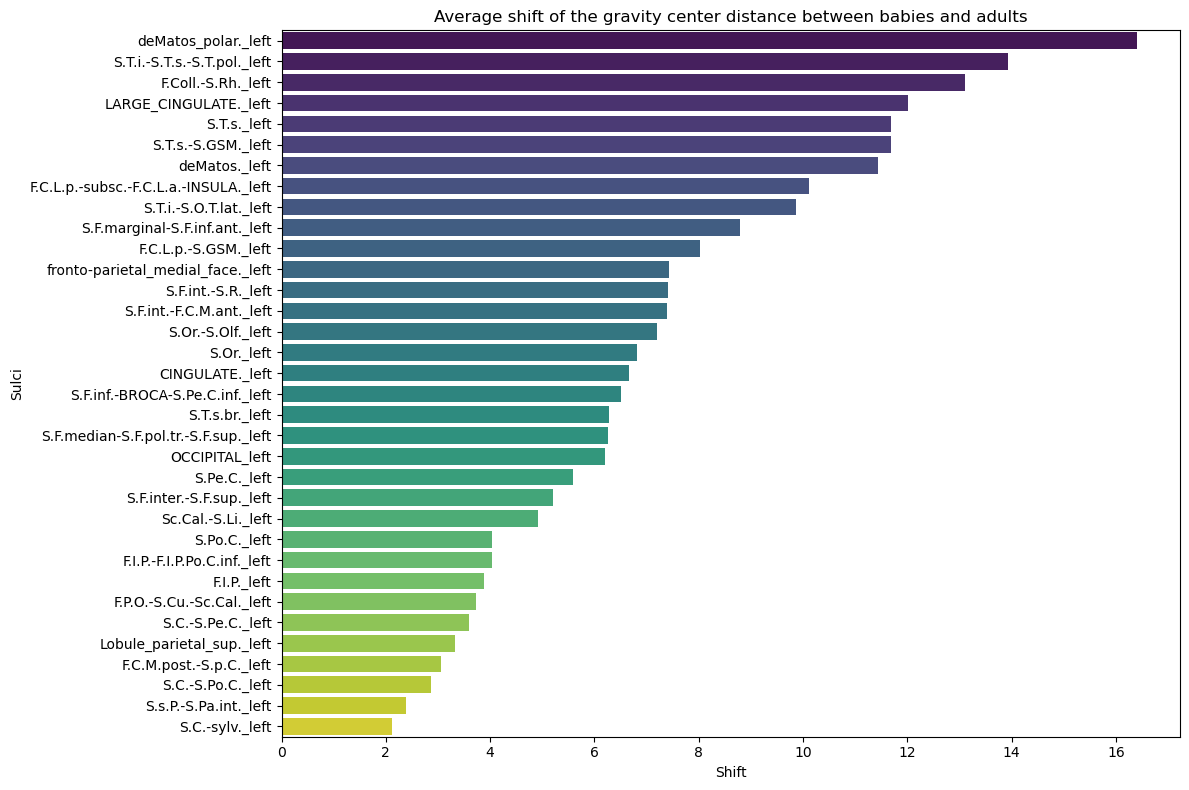

In [42]:
import seaborn as sns
# Sort the dataframe by distance
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Program/2025_rmenasria_prematurity/notebooks/racim/all_regions_gravity_center_shifts.csv").sort_values(by="distance", ascending=False)
df_left_sulci = df_all_shifts_sorted[df_all_shifts_sorted["region"].str.contains("_left")]

plt.figure(figsize=(12, 8))
sns.barplot(data=df_left_sulci ,x="distance", y="region", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity center distance between babies and adults")
plt.tight_layout()
plt.show()

/tmp/ipykernel_652808/2327249945.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_left_sulci, x="shift_x", y="region", palette="viridis")


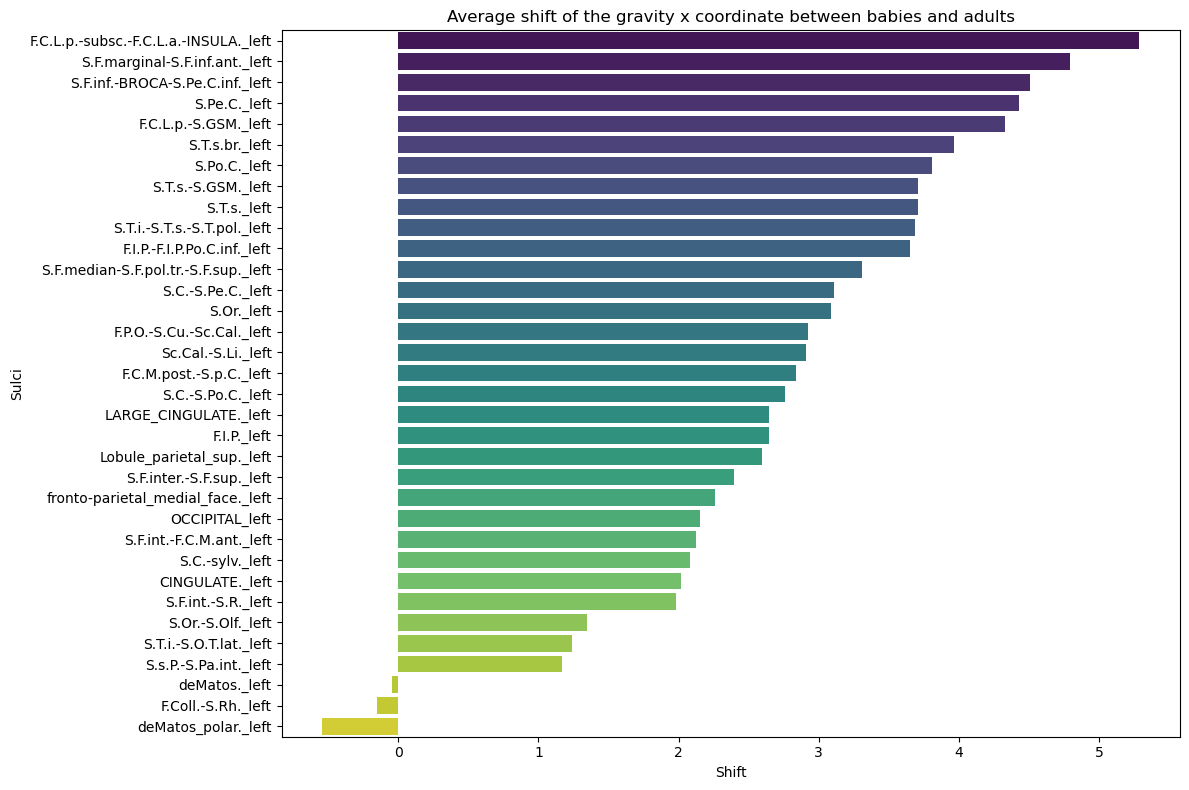

In [43]:
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Program/2025_rmenasria_prematurity/notebooks/racim/all_regions_gravity_center_shifts.csv").sort_values(by="shift_x", ascending=False)
df_left_sulci = df_all_shifts_sorted[df_all_shifts_sorted["region"].str.contains("_left")]



plt.figure(figsize=(12, 8))
sns.barplot(data=df_left_sulci, x="shift_x", y="region", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity x coordinate between babies and adults")
plt.tight_layout()
plt.show()

/tmp/ipykernel_652808/3683519072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_left_sulci, x="shift_y", y="region", palette="viridis")


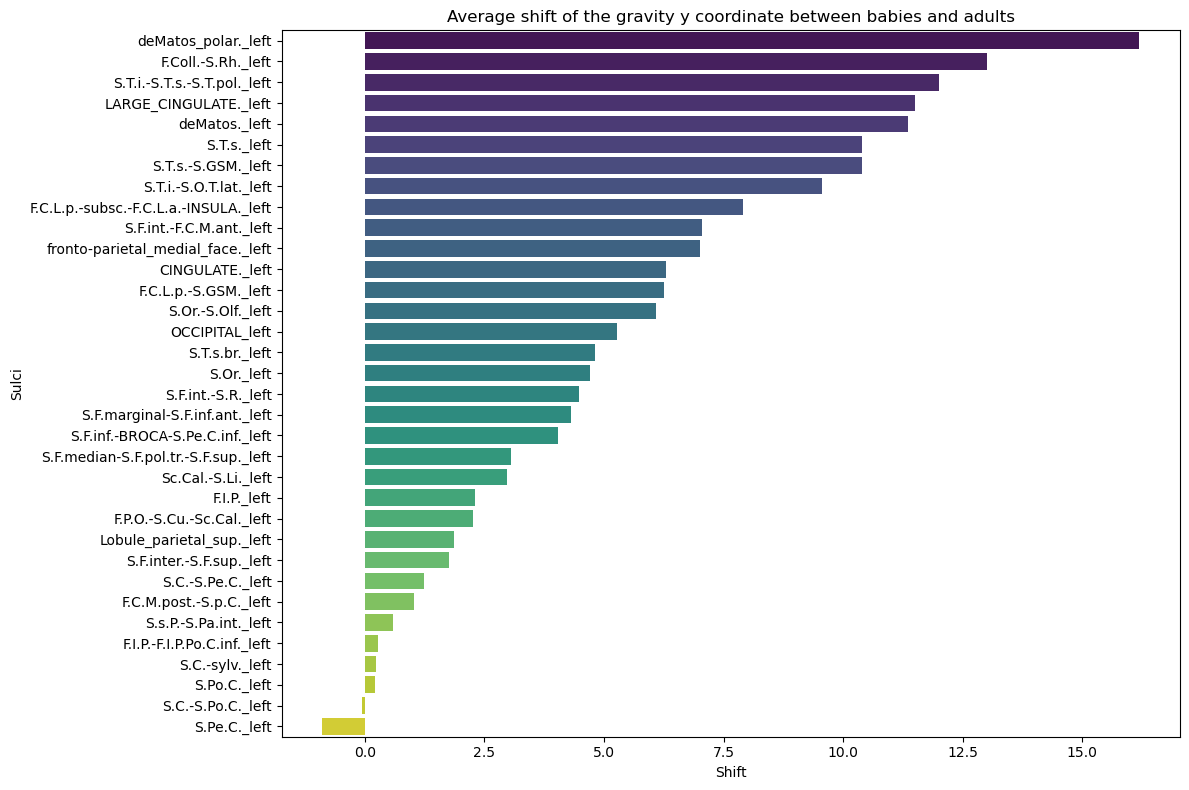

In [44]:
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Program/2025_rmenasria_prematurity/notebooks/racim/all_regions_gravity_center_shifts.csv").sort_values(by="shift_y", ascending=False)
df_left_sulci = df_all_shifts_sorted[df_all_shifts_sorted["region"].str.contains("_left")]


plt.figure(figsize=(12, 8))
sns.barplot(data=df_left_sulci, x="shift_y", y="region", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity y coordinate between babies and adults")
plt.tight_layout()
plt.show()

/tmp/ipykernel_652808/322237157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_left_sulci, x="shift_z", y="region", palette="viridis")


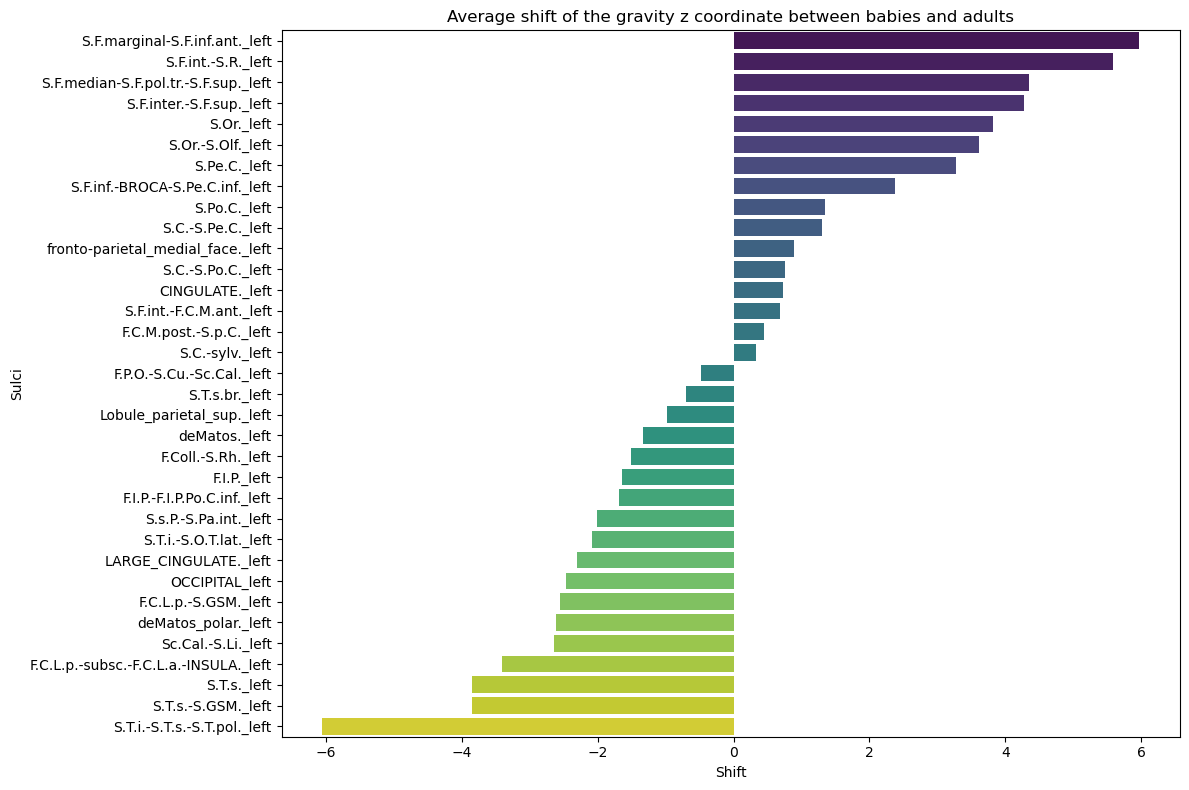

In [45]:
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Program/2025_rmenasria_prematurity/notebooks/racim/all_regions_gravity_center_shifts.csv").sort_values(by="shift_z", ascending=False)
df_left_sulci = df_all_shifts_sorted[df_all_shifts_sorted["region"].str.contains("_left")]

plt.figure(figsize=(12, 8))
sns.barplot(data=df_left_sulci, x="shift_z", y="region", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity z coordinate between babies and adults")
plt.tight_layout()
plt.show()